In [ ]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow.keras.datasets.mnist as mnist

In [4]:
import numpy as np

In [63]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Normalise or change into Grey color

In [64]:
x_train = x_train/255.0

In [13]:
y_train.shape

(60000,)

In [19]:
y_train[0]

5

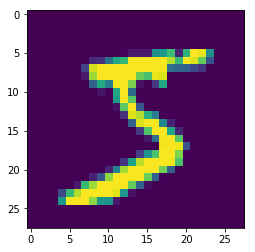

In [65]:
#plt.x_train[0]
plt.imshow(x_train[0])

In [66]:
class_ = np.array([0,1,2,3,4,5,6,7,8,9])

In [19]:
class_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
#x_train = x_train.T
inputShape = x_train.shape
inputShape

(60000, 28, 28)

In [69]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(784, activation = 'relu'),
        tf.keras.layers.Dense((784), activation = 'relu'),                
        tf.keras.layers.Dense(10)
]) 

In [70]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
model.fit(x_train,y_train,epochs=5) 

Epoch 1/5
60000/60000 [==============================] - 24s 394us/sample - loss: 0.1791 - acc: 0.9443
Epoch 2/5
60000/60000 [==============================] - 23s 390us/sample - loss: 0.0788 - acc: 0.9763
Epoch 3/5
60000/60000 [==============================] - 25s 422us/sample - loss: 0.0580 - acc: 0.9816
Epoch 4/5
60000/60000 [==============================] - 25s 425us/sample - loss: 0.0431 - acc: 0.9862
Epoch 5/5
60000/60000 [==============================] - 24s 405us/sample - loss: 0.0365 - acc: 0.9892


In [72]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 16.1027 - acc: 0.9806


[16.102656823023363, 0.9806]

In [73]:
predictions = probability_model.predict(x_test)

In [83]:
tf.nn.softmax(predictions)

<tf.Tensor 'Softmax_5:0' shape=(10000, 10) dtype=float32>

0

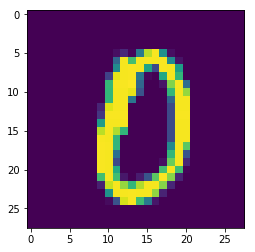

In [97]:
#print(predictions[10])
index = 55
plt.imshow(x_test[index])
class_[np.argmax(predictions[index], axis = None, out = None)]

### Predict for 01 input

In [166]:
test_pc = x_train[3]

In [158]:
# Check the input shape to the initial input
test_pc.shape

(28, 28)

In [160]:
# initial input shape
x_train.shape

(60000, 28, 28)

In [167]:
# Resize out input to the initial shape
# Our input is numpy, so we use numpy.resize()
test_pc_resized = np.resize(test_pc,(1,28,28))

In [162]:
# check shape of our input
test_pc_resized.shape

(1, 28, 28)

### Now predict

In [168]:
pred = probability_model.predict(test_pc_resized)

In [164]:
pred

array([[6.5893169e-20, 1.7064769e-16, 1.6850743e-13, 4.9943517e-21,
        1.3011926e-18, 3.4174254e-19, 2.0673651e-33, 1.0000000e+00,
        6.4614556e-18, 7.9053958e-10]], dtype=float32)

In [169]:
# Now check for maximum probability by passing it to numpy's argmax() 
final_prid = class_[np.argmax(pred)]
final_prid

1